In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diabetes1.csv')
df.head()

,Age,BMI,Blood_Sugar_Level,Family_History,Diet,Diabetes
0,45,28.7,135,Yes,Poor,Yes
1,50,31.2,145,No,Moderate,Yes
2,30,22.0,95,No,Good,No
3,35,25.4,105,Yes,Poor,Yes
4,60,33.5,155,Yes,Poor,Yes


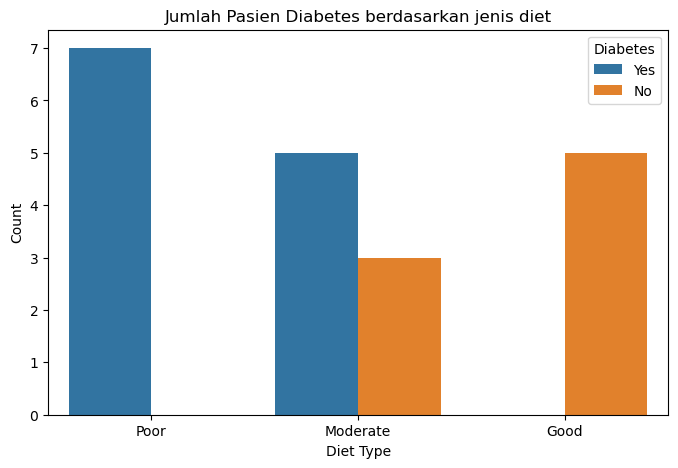

In [3]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x = 'Diet', hue = 'Diabetes')
plt.title('Jumlah Pasien Diabetes berdasarkan jenis diet')
plt.xlabel('Diet Type')
plt.ylabel('Count')
plt.legend(title = 'Diabetes')
plt.show()

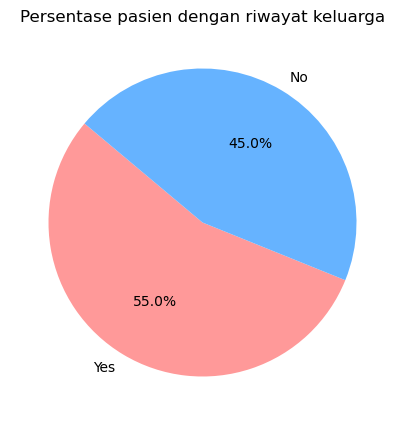

In [4]:
# 2
family_history_counts = df['Family_History'].value_counts()
plt.figure(figsize=(5,5))
family_history_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Persentase pasien dengan riwayat keluarga')
plt.ylabel('')
plt.show()

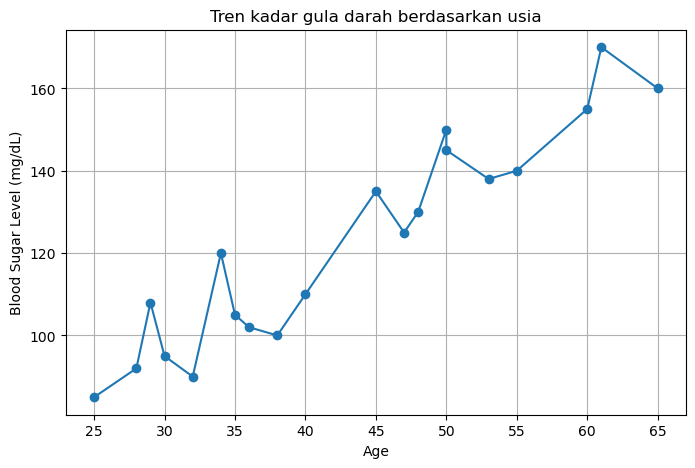

In [5]:
# 3
df_sorted = df.sort_values(by='Age')
plt.figure(figsize=(8,5))
plt.plot(df_sorted['Age'], df_sorted['Blood_Sugar_Level'], marker = 'o')
plt.title('Tren kadar gula darah berdasarkan usia')
plt.xlabel('Age')
plt.ylabel('Blood Sugar Level (mg/dL)')
plt.grid(True)
plt.show()

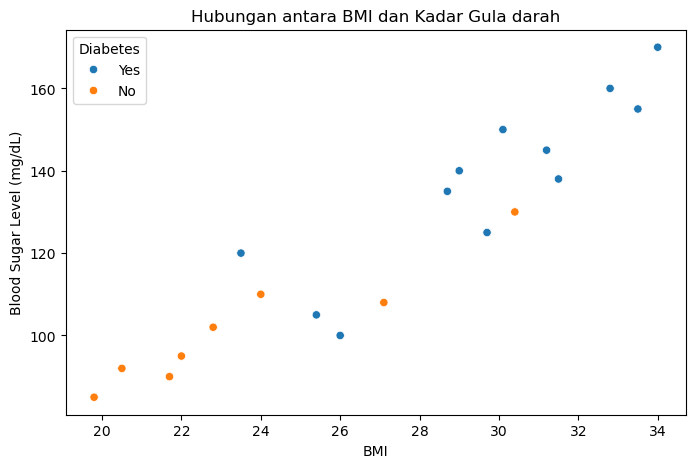

In [6]:
# 4
plt.figure(figsize=(8,5))
sns.scatterplot(data = df, x = 'BMI', y = 'Blood_Sugar_Level', hue = 'Diabetes')
plt.title('Hubungan antara BMI dan Kadar Gula darah')
plt.xlabel('BMI')
plt.ylabel('Blood Sugar Level (mg/dL)')
plt.legend(title = 'Diabetes')
plt.show()

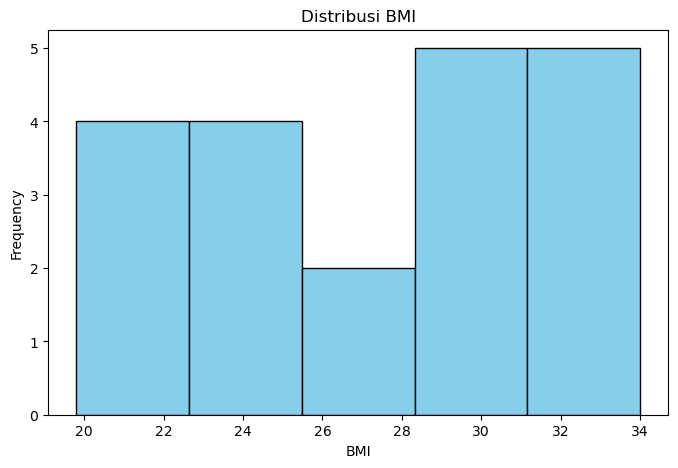

In [7]:
# 5
plt.figure(figsize=(8,5))
plt.hist(df['BMI'], bins = 5, color = 'skyblue', edgecolor = 'black')
plt.title('Distribusi BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

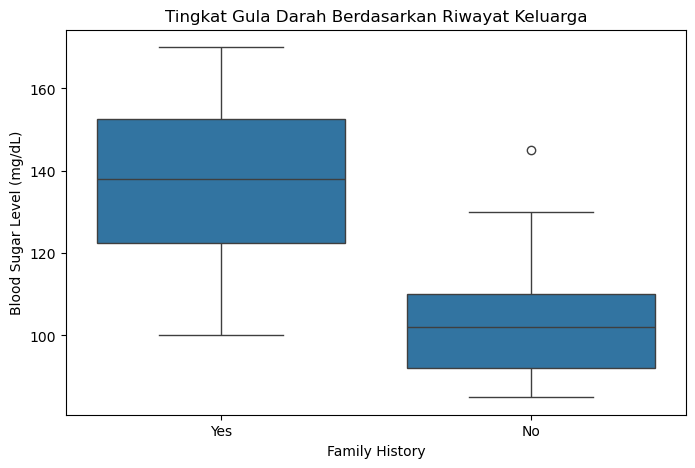

In [8]:
# 6
plt.figure(figsize=(8,5))
sns.boxplot(data = df, x = 'Family_History', y = 'Blood_Sugar_Level')
plt.title('Tingkat Gula Darah Berdasarkan Riwayat Keluarga')
plt.xlabel('Family History')
plt.ylabel('Blood Sugar Level (mg/dL)')
plt.show()

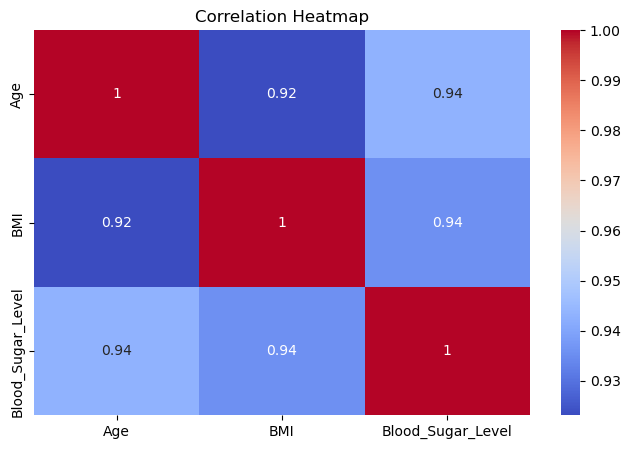

In [9]:
#7
plt.figure(figsize=(8,5))
sns.heatmap(df[['Age','BMI','Blood_Sugar_Level']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

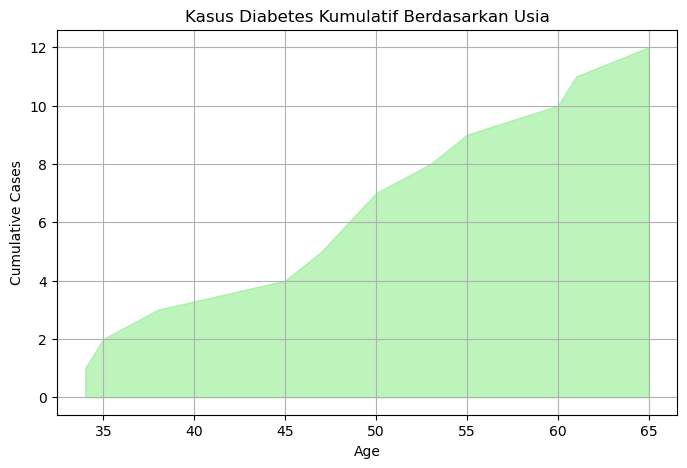

In [10]:
# 8
age_cum_cases = df[df['Diabetes'] == 'Yes'].groupby('Age').size().cumsum()
plt.figure(figsize=(8,5))
plt.fill_between(age_cum_cases.index, age_cum_cases.values, color = 'lightgreen', alpha = 0.6)
plt.title('Kasus Diabetes Kumulatif Berdasarkan Usia')
plt.xlabel('Age')
plt.ylabel('Cumulative Cases')
plt.grid(True)
plt.show()

In [11]:
# Membuat DataFrame
df_encode = pd.DataFrame(df)

In [ ]:
)df_encode['Family_History'] = df_encode['Family_History'].map({'Yes':1, 'No':0})
df_encode['Diet'] = df_encode['Diet'].map({'Poor':0, 'Moderate':1, 'Good':2})
df_encode['Diabetes'] = df_encode['Diabetes'].map({'Yes':1, 'No':0}

In [13]:
df_encode.head()

,Age,BMI,Blood_Sugar_Level,Family_History,Diet,Diabetes
0,45,28.7,135,1,0,1
1,50,31.2,145,0,1,1
2,30,22.0,95,0,2,0
3,35,25.4,105,1,0,1
4,60,33.5,155,1,0,1


In [14]:
# mempersiapkan data
categorical_df = df_encode.copy()
categorical_df['Age'] = pd.cut(categorical_df['Age'], bins = [0,30,40,50,60,80], labels = [0,1,2,3,4])
categorical_df['BMI'] = pd.cut(categorical_df['BMI'], bins = [0,18.5,24.9,29.9,50], labels = [0,1,2,3])
categorical_df['Blood_Sugar_Level'] = pd.cut(categorical_df['Blood_Sugar_Level'], bins = [0,100,125,150,200], labels = [0,1,2,3])

In [15]:
categorical_df.head()

,Age,BMI,Blood_Sugar_Level,Family_History,Diet,Diabetes
0,2,2,2,1,0,1
1,2,3,2,0,1,1
2,0,1,0,0,2,0
3,1,2,1,1,0,1
4,3,3,3,1,0,1


In [16]:
X_categorical = categorical_df[['Age', 'BMI', 'Blood_Sugar_Level', 'Family_History', 'Diet']]
y_categorical = categorical_df['Diabetes']

In [17]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_categorical, y_categorical, test_size=0.3, random_state=42)

In [18]:
cat_nb_model = CategoricalNB()
cat_nb_model.fit(X_train_cat, y_train_cat)

CategoricalNB()

In [19]:
y_pred_cat = cat_nb_model.predict(X_test_cat)

In [20]:
new_data_categorical = np.array([[3,2,1,1,0]])
new_prediction_cat = cat_nb_model.predict(new_data_categorical)

c:\Users\rapsa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but CategoricalNB was fitted with feature names
  warnings.warn(


In [21]:
(new_prediction_cat)

array([1], dtype=int64)

In [22]:
if (new_prediction_cat[0] == 0):
    print('Pasien Tidak terkena diabetes')
else :
    print('Pasien terkena diabetes')

Pasien terkena diabetes


In [23]:
cat_accuracy = accuracy_score(y_test_cat, y_pred_cat)

In [24]:
cat_conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)

In [25]:
(cat_accuracy, cat_conf_matrix)

(0.8333333333333334,
 array([[2, 0],
        [1, 3]], dtype=int64))

In [26]:
import pickle
filename = 'cat_diabetes_mod.pkl'
pickle.dump(cat_nb_model, open(filename, 'wb'))